In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets(".", one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [4]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()


for _ in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.4075
0.4029
0.4927
0.5023
0.6827
0.4972
0.7257
0.7076
0.6808
0.7821
0.7311
0.7984
0.7478
0.7959
0.816
0.8162
0.8256
0.8379
0.8455
0.7874
0.8062
0.8478
0.8206
0.8508
0.8498
0.8481
0.8395
0.83
0.8551
0.8696
0.8515
0.8429
0.8581
0.8546
0.8602
0.8588
0.8337
0.8494
0.7981
0.8557
0.869
0.8695
0.8684
0.8542
0.8672
0.8553
0.8643
0.8606
0.8672
0.8609
0.8725
0.8744
0.8247
0.8613
0.8773
0.878
0.875
0.8757
0.8839
0.8809
0.8772
0.876
0.869
0.8794
0.8745
0.8747
0.8716
0.8671
0.8655
0.8604
0.8629
0.8495
0.8724
0.8746
0.8797
0.8577
0.8707
0.884
0.8814
0.8832
0.8829
0.8853
0.8755
0.8857
0.8859
0.8867
0.8852
0.8861
0.8859
0.8828
0.882
0.8854
0.8876
0.8814
0.891
0.887
0.8672
0.8766
0.889
0.8943


In [5]:
tf.cast?

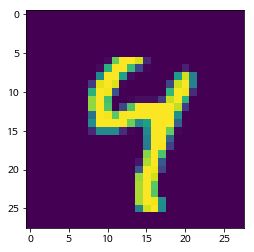

In [6]:
plt.imshow(mnist.train.images[2].reshape((28, 28)))

In [7]:
sess.run(train_step, feed_dict={x: mnist.train.images[0:5], y_: mnist.train.labels[0:5]})

In [8]:
sess.run(tf.argmax(y, 1), feed_dict={x: mnist.train.images[0:10]})

array([7, 3, 4, 6, 1, 8, 1, 0, 4, 8])

In [9]:
mnist.train.labels[0:10].argmax(1)

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8])

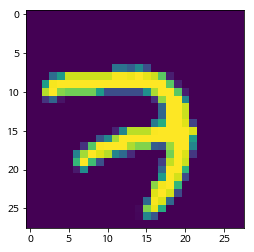

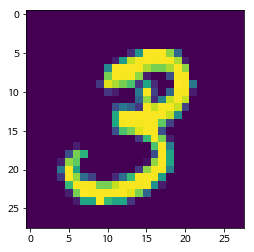

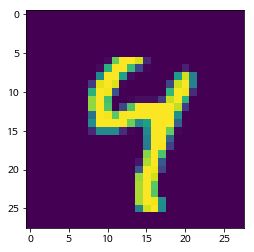

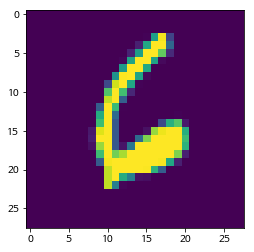

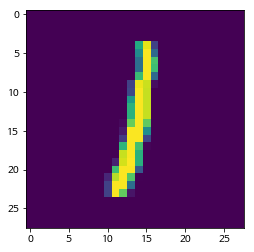

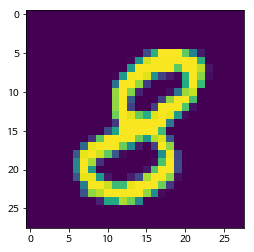

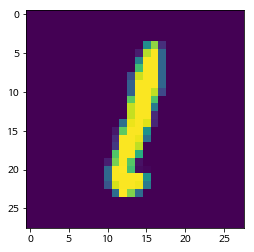

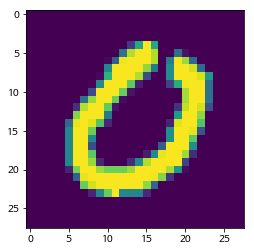

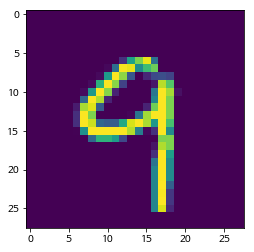

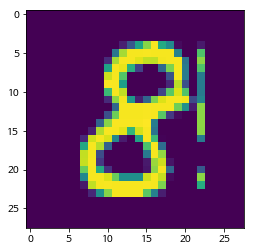

In [10]:
for i in range(10):
    plt.imshow(mnist.train.images[i].reshape((28, 28)))
    plt.show()